### Loading processed discussion board data

In [2]:
import pandas as pd
import numpy as np
df = pd.read_pickle('data_clean.pkl')
df.Message_words = df.Message_words.apply(lambda x: [i.lower() for i in x])
df

,Date,User_Id,Message,NumberOfPastPosts,Role,Message_words
0,2001-09-01,pat,Need help choosing your next vehicle? Tell us ...,"10,421",Member,"[need, help, choosing, next, vehicle, tell, us..."
1,2001-09-01,willow25,"I'm buying a ""new"" car by the end of the year ...",2,Member,"[im, buying, new, car, end, year, first, choic..."
2,2001-10-01,dindak,Buy a 2001/ 2002 Oldsmobile Intrigue. It's one...,"6,632",Member,"[buy, 2001, 2002, oldsmobile, intrigue, one, b..."
3,2001-10-01,peteri1,Am looking at 1 of 4 choices to replace my 99G...,21,Member,"[looking, 1, 4, choices, replace, 99gs400, ive..."
4,2001-10-01,mrdetailer,Generally a 3-4 year old car range is a good o...,"1,118",Member,"[generally, 34, year, old, car, range, good, o..."
...,...,...,...,...,...,...
4146,2021-02-01,kyfdx,qbrozen said: show previous quoteskyfdx said:I...,"203,030",Moderator,"[qbrozen, said, show, previous, quoteskyfdx, s..."
4147,2021-02-01,backy,KamCottage said:Thank you backy. Since I first...,"18,946",Member,"[kamcottage, saidthank, backy, since, first, p..."
4148,2021-02-01,RayeEliza,I am doing major research in trying to find my...,6,Member,"[major, research, trying, find, new, car, lean..."
4149,2021-02-01,mlevine,I would lean toward subaru. Need to see which ...,512,Member,"[would, lean, toward, subaru, need, see, model..."


### Loading and cleaning models.csv

In [3]:
models = pd.read_csv('models.csv', header=None, names = ['brand', 'model'])
models['brand'] = models['brand'].str.replace(r'[^\w\s]+', '', regex=True)
models['model'] = models['model'].str.replace(r'[^\w\s]+', '', regex=True)

#drop row with: car, problem, seat 
searchfor = ["car", "problem", "seat", "sedan"]
models = models[~models.brand.str.contains('|'.join(searchfor))]

models

,brand,model
0,acura,integra
1,acura,Legend
2,acura,vigor
3,acura,rlx
4,acura,ILX
...,...,...
523,volvo,xc90
524,volvo,s60
525,volvo,s80
526,volvo,v60


### Replacing models with brands

In [5]:
messages = df.Message_words.to_list()

# numpy.where to do the replacement
messages2 = []
t = 0
for m in messages:
    for i,row in models.iterrows():
        m = np.where(m == row['model'], row['brand'], m)
        
    t+=1
    #print(t)
        
    messages2.append(m)
        
df['Message_words_v2'] = messages2

In [6]:
import joblib 
df.to_pickle('df_brands.pickle')


### Brand Frequency Count 

In [215]:
#loading dataframe with messages where models have been replaced with brands 
df = pd.read_pickle("df_brands.pickle")

mentions = []
brand_names = models.brand.unique()

#creating a dummy column for each brand, 1 = brand has been mentioned in the message 
for i in brand_names: 
    count = 0
    for j in df.Message_words_v2: 
        if(i in j):
            count +=1 
    
    mentions.append(count)

In [216]:
#all brands, mentions 
brand_freq.head(20)

,brand,mentions
0,acura,209
1,audi,224
2,bmw,275
3,buick,151
4,cadillac,66
5,chevrolet,337
6,chrysler,185
7,dodge,94
8,ford,284
9,honda,924


### Identifying Top 10 Brands 

In [217]:
brand_freq = pd.DataFrame({'brand': brand_names, 'mentions': mentions})
#dataframe with top 10 
top10 = brand_freq.sort_values('mentions', ascending = False).head(10)

top10v = top10.copy()

#adding column: percentage of mentions, per brand 
pct_list = []
for i in top10v.mentions: 
    pct = (i*100)/brand_freq.mentions.sum()
    pct = "{:.2f}".format(pct)
    pct_list.append(pct)

top10v["Percentage_Mentions"] = pct_list
#renaming columns 
top10v.columns = ['Brand', 'Total_Mentions','% of Mentions']

#index starting from 1 
top10v = top10v.reset_index(drop=True)
top10v.index += 1 

#capitalizing brand names 
for i in range(len(top10v.Brand)): 
    top10v.Brand[i+1] = top10v.Brand[i+1].capitalize()

top10v


/var/folders/ng/_pmg5th94cv_sncvyjylvr0w0000gn/T/ipykernel_19016/3584300221.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Brand,Total_Mentions,% of Mentions
1,Honda,924,15.65
2,Toyota,769,13.02
3,Nissan,525,8.89
4,Volkswagen,370,6.26
5,Chevrolet,337,5.71
6,Mazda,312,5.28
7,Ford,284,4.81
8,Bmw,275,4.66
9,Hyundai,237,4.01
10,Audi,224,3.79


/var/folders/ng/_pmg5th94cv_sncvyjylvr0w0000gn/T/ipykernel_19016/1089327547.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



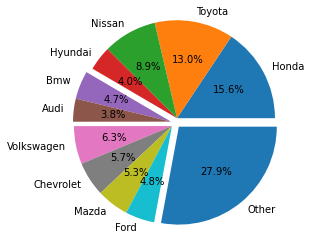

In [218]:
#pie chart grouped by k-means clusters
all_df = top10.copy()

others_val = brand_freq.mentions.sum() - top10.mentions.sum()

#index starting from 1 
all_df = all_df.reset_index(drop=True)
all_df.index += 1 

#capitalizing brand names 
for i in range(len(all_df.brand)): 
    all_df.brand[i+1] = all_df.brand[i+1].capitalize()

all_df.loc[11] = ['Other', others_val]

k_labels = [0,0,0,2,2,2,2,1,0,1,3]
#appending labels from k-means clustering 
all_df['labels'] = k_labels 
all_df = all_df.sort_values('labels')

fig, ax = plt.subplots()
ax.set_aspect('equal')

data = all_df.mentions
wedges, texts, percs = ax.pie(data, labels= all_df.brand,
                              autopct="%1.1f%%")

groups = [[0, 1, 2,3], [ 4,5], [6, 7,8,9],[10]]

radfraction = 0.05

for group in groups:
    ang = np.deg2rad((wedges[group[-1]].theta2 + wedges[group[0]].theta1) / 2)
    for j in group:
        center = radfraction * wedges[j].r * np.array([np.cos(ang), np.sin(ang)])
        wedges[j].set_center(center)
        texts[j].set_position(np.array(texts[j].get_position()) + center)
        percs[j].set_position(np.array(percs[j].get_position()) + center)

ax.autoscale(True)
plt.show()



In [219]:
#bar plot of total mentions
fig = px.bar(top10v, y='Total_Mentions', x='Brand', text='Total_Mentions')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

In [220]:
brand_names = top10.brand

for i in brand_names: 
    y = []
    for j in df.Message_words_v2: 
        if(i in j):
            var = 1
            y.append(var)
        else: 
            var = 0
            y.append(var)  
    
    df[i] = y

    
df

,Date,User_Id,Message,NumberOfPastPosts,Role,Message_words,Message_words_v2,honda,toyota,nissan,volkswagen,chevrolet,mazda,ford,bmw,hyundai,audi
0,2001-09-01,pat,Need help choosing your next vehicle? Tell us ...,"10,421",Member,"[need, help, choosing, next, vehicle, tell, us...","[need, help, choosing, next, vehicle, tell, us...",0,0,0,0,0,0,0,0,0,0
1,2001-09-01,willow25,"I'm buying a ""new"" car by the end of the year ...",2,Member,"[im, buying, new, car, end, year, first, choic...","[im, buying, new, car, end, year, first, choic...",0,0,1,0,0,0,0,0,0,0
2,2001-10-01,dindak,Buy a 2001/ 2002 Oldsmobile Intrigue. It's one...,"6,632",Member,"[buy, 2001, 2002, oldsmobile, intrigue, one, b...","[buy, 2001, 2002, oldsmobile, intrigue, one, b...",0,0,0,0,0,0,0,0,0,0
3,2001-10-01,peteri1,Am looking at 1 of 4 choices to replace my 99G...,21,Member,"[looking, 1, 4, choices, replace, 99gs400, ive...","[looking, 1, 4, choices, replace, 99gs400, ive...",0,0,0,0,0,0,0,0,0,1
4,2001-10-01,mrdetailer,Generally a 3-4 year old car range is a good o...,"1,118",Member,"[generally, 34, year, old, car, range, good, o...","[generally, 34, year, old, car, range, good, o...",0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4146,2021-02-01,kyfdx,qbrozen said: show previous quoteskyfdx said:I...,"203,030",Moderator,"[qbrozen, said, show, previous, quoteskyfdx, s...","[qbrozen, said, show, previous, quoteskyfdx, s...",1,1,0,0,0,0,0,0,0,0
4147,2021-02-01,backy,KamCottage said:Thank you backy. Since I first...,"18,946",Member,"[kamcottage, saidthank, backy, since, first, p...","[kamcottage, saidthank, backy, since, first, p...",1,1,0,0,0,0,0,0,0,0
4148,2021-02-01,RayeEliza,I am doing major research in trying to find my...,6,Member,"[major, research, trying, find, new, car, lean...","[major, research, trying, find, new, car, lean...",0,1,0,0,0,0,0,0,0,0
4149,2021-02-01,mlevine,I would lean toward subaru. Need to see which ...,512,Member,"[would, lean, toward, subaru, need, see, model...","[would, lean, toward, subaru, need, see, model...",1,0,0,0,0,1,0,0,0,0


In [221]:
#calculating probability of brand occurences 

tot_messages = df.shape[0]
brand_names = top10.brand.to_list()

prob_df = pd.DataFrame(columns = brand_names)

for i in brand_names: 
    prob =[]
    for j in brand_names: 
        if i == j: 
            #calculating P(I)
            prob_val = df[i].sum()/tot_messages
            prob.append(prob_val)
        else:
            #calculating P(I&J)
            both = 0
            for c in range(tot_messages):
                if df[i][c] == 1 & df[j][c] == 1:
                    both += 1
            prob_val = both/tot_messages 
            prob.append(prob_val)
                             
    prob_df[i] = prob

#renaming the index 
prob_df.index = brand_names
prob_df      


,honda,toyota,nissan,volkswagen,chevrolet,mazda,ford,bmw,hyundai,audi
honda,0.222597,0.081908,0.050831,0.026259,0.024091,0.024813,0.025536,0.013009,0.024331,0.010600
toyota,0.081908,0.185257,0.037822,0.021682,0.026741,0.024091,0.022886,0.011323,0.020236,0.007468
nissan,0.050831,0.037822,0.126476,0.016141,0.013732,0.012286,0.008914,0.006745,0.010359,0.006986
volkswagen,0.026259,0.021682,0.016141,0.089135,0.010600,0.011323,0.008191,0.008191,0.006745,0.011082
chevrolet,0.024091,0.026741,0.013732,0.010600,0.081185,0.008673,0.017345,0.004095,0.007227,0.002891
mazda,0.024813,0.024091,0.012286,0.011323,0.008673,0.075163,0.011563,0.003614,0.008191,0.003854
ford,0.025536,0.022886,0.008914,0.008191,0.017345,0.011563,0.068417,0.004577,0.008914,0.003132
bmw,0.013009,0.011323,0.006745,0.008191,0.004095,0.003614,0.004577,0.066249,0.003132,0.016623
hyundai,0.024331,0.020236,0.010359,0.006745,0.007227,0.008191,0.008914,0.003132,0.057095,0.002168
audi,0.010600,0.007468,0.006986,0.011082,0.002891,0.003854,0.003132,0.016623,0.002168,0.053963


In [222]:
def lift_calculator(a,b, prob_df):
    prob_a = prob_df.loc[a,a]
    prob_b = prob_df.loc[b,b]
    porb_a_b = prob_df.loc[a,b]
    lift = porb_a_b/ (prob_a* prob_b)
    return lift
    

In [223]:
#calculating lift between brands 

lift_df = pd.DataFrame(columns = brand_names)

for i in brand_names:
    lift = []
    for j in brand_names:
        if i == j: 
            lift_val = None
            lift.append(lift_val)
        else: 
            lift_val = lift_calculator(i,j,prob_df)
            lift.append(lift_val)
    lift_df[i] = lift

#renaming the index 
lift_df.index = brand_names
lift_df  
            

,honda,toyota,nissan,volkswagen,chevrolet,mazda,ford,bmw,hyundai,audi
honda,NaN,1.986247,1.805527,1.323444,1.333064,1.483076,1.676750,0.882149,1.914493,0.882440
toyota,1.986247,NaN,1.614235,1.313007,1.777950,1.730102,1.805642,0.922553,1.913187,0.747033
nissan,1.805527,1.614235,NaN,1.431748,1.337329,1.292436,1.030094,0.805042,1.434543,1.023631
volkswagen,1.323444,1.313007,1.431748,NaN,1.464785,1.690029,1.343110,1.387066,1.325442,2.303885
chevrolet,1.333064,1.777950,1.337329,1.464785,NaN,1.421251,3.122748,0.761446,1.559178,0.659866
mazda,1.483076,1.730102,1.292436,1.690029,1.421251,NaN,2.248646,0.725699,1.908661,0.950321
ford,1.676750,1.805642,1.030094,1.343110,3.122748,2.248646,NaN,1.009846,2.281854,0.848261
bmw,0.882149,0.922553,0.805042,1.387066,0.761446,0.725699,1.009846,NaN,0.827971,4.649659
hyundai,1.914493,1.913187,1.434543,1.325442,1.559178,1.908661,2.281854,0.827971,NaN,0.703718
audi,0.882440,0.747033,1.023631,2.303885,0.659866,0.950321,0.848261,4.649659,0.703718,NaN


In [224]:
def make_pretty(styler):
    styler.set_caption("Weather Conditions")
    styler.background_gradient(axis=None, vmin=1, vmax=5, cmap="YlGnBu")
    return styler

make_pretty(lift_df.style)

,honda,toyota,nissan,volkswagen,chevrolet,mazda,ford,bmw,hyundai,audi
honda,nan,1.986247,1.805527,1.323444,1.333064,1.483076,1.676750,0.882149,1.914493,0.882440
toyota,1.986247,nan,1.614235,1.313007,1.777950,1.730102,1.805642,0.922553,1.913187,0.747033
nissan,1.805527,1.614235,nan,1.431748,1.337329,1.292436,1.030094,0.805042,1.434543,1.023631
volkswagen,1.323444,1.313007,1.431748,nan,1.464785,1.690029,1.343110,1.387066,1.325442,2.303885
chevrolet,1.333064,1.777950,1.337329,1.464785,nan,1.421251,3.122748,0.761446,1.559178,0.659866
mazda,1.483076,1.730102,1.292436,1.690029,1.421251,nan,2.248646,0.725699,1.908661,0.950321
ford,1.676750,1.805642,1.030094,1.343110,3.122748,2.248646,nan,1.009846,2.281854,0.848261
bmw,0.882149,0.922553,0.805042,1.387066,0.761446,0.725699,1.009846,nan,0.827971,4.649659
hyundai,1.914493,1.913187,1.434543,1.325442,1.559178,1.908661,2.281854,0.827971,nan,0.703718
audi,0.882440,0.747033,1.023631,2.303885,0.659866,0.950321,0.848261,4.649659,0.703718,nan


In [235]:
import numpy as np
np.tril(np.ones(lift_df.shape)).astype(np.bool)[0:10,0:10]
df_lt = lift_df.where(np.tril(np.ones(lift_df.shape)).astype(np.bool))
df_lt


#dealing with null values 
df_lt.fillna(df_lt.max().max()+1, inplace=True)

def color_max_white(val, max_val):
    color = 'white' if val == max_val else 'black'
    return 'color: %s' % color

def highlight_max(data, color='white'):
    attr = 'background-color: {}'.format(color)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_max = data == data.max()
        return [attr if v else '' for v in is_max]
    else:  # from .apply(axis=None)
        is_max = data == data.max().max()
        return pd.DataFrame(np.where(is_max, attr, ''),
                            index=data.index, columns=data.columns)

max_val = df_lt.max().max()
#df_lt.style.format("{:.2f}").background_gradient(cmap='YlGnBu', axis=None).applymap(lambda x: color_max_white(x, max_val)).apply(highlight_max, axis=None)

def make_pretty(styler):
    styler.set_caption("Lift Ratios")
    styler.background_gradient(cmap='YlGnBu', axis=None).applymap(lambda x: color_max_white(x, max_val)).apply(highlight_max, axis=None)
    return styler

make_pretty(df_lt.style)

/var/folders/ng/_pmg5th94cv_sncvyjylvr0w0000gn/T/ipykernel_19016/2437460386.py:2: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/var/folders/ng/_pmg5th94cv_sncvyjylvr0w0000gn/T/ipykernel_19016/2437460386.py:3: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



,honda,toyota,nissan,volkswagen,chevrolet,mazda,ford,bmw,hyundai,audi
honda,0.000000,5.649659,5.649659,5.649659,5.649659,5.649659,5.649659,5.649659,5.649659,5.649659
toyota,1.986247,0.000000,5.649659,5.649659,5.649659,5.649659,5.649659,5.649659,5.649659,5.649659
nissan,1.805527,1.614235,0.000000,5.649659,5.649659,5.649659,5.649659,5.649659,5.649659,5.649659
volkswagen,1.323444,1.313007,1.431748,0.000000,5.649659,5.649659,5.649659,5.649659,5.649659,5.649659
chevrolet,1.333064,1.777950,1.337329,1.464785,0.000000,5.649659,5.649659,5.649659,5.649659,5.649659
mazda,1.483076,1.730102,1.292436,1.690029,1.421251,0.000000,5.649659,5.649659,5.649659,5.649659
ford,1.676750,1.805642,1.030094,1.343110,3.122748,2.248646,0.000000,5.649659,5.649659,5.649659
bmw,0.882149,0.922553,0.805042,1.387066,0.761446,0.725699,1.009846,0.000000,5.649659,5.649659
hyundai,1.914493,1.913187,1.434543,1.325442,1.559178,1.908661,2.281854,0.827971,0.000000,5.649659
audi,0.882440,0.747033,1.023631,2.303885,0.659866,0.950321,0.848261,4.649659,0.703718,0.000000


### MDS Plot

In [236]:
#lift ratio across brands 
lift_df = pd.DataFrame(columns = brand_names)

for i in brand_names:
    lift = []
    for j in brand_names:
        if i == j: 
            lift_val = 0
            lift.append(lift_val)
        else: 
            lift_val = lift_calculator(i,j,prob_df)
            lift.append(lift_val)
    lift_df[i] = lift

#renaming the index 
lift_df.index = brand_names
lift_df  

,honda,toyota,nissan,volkswagen,chevrolet,mazda,ford,bmw,hyundai,audi
honda,0.000000,1.986247,1.805527,1.323444,1.333064,1.483076,1.676750,0.882149,1.914493,0.882440
toyota,1.986247,0.000000,1.614235,1.313007,1.777950,1.730102,1.805642,0.922553,1.913187,0.747033
nissan,1.805527,1.614235,0.000000,1.431748,1.337329,1.292436,1.030094,0.805042,1.434543,1.023631
volkswagen,1.323444,1.313007,1.431748,0.000000,1.464785,1.690029,1.343110,1.387066,1.325442,2.303885
chevrolet,1.333064,1.777950,1.337329,1.464785,0.000000,1.421251,3.122748,0.761446,1.559178,0.659866
mazda,1.483076,1.730102,1.292436,1.690029,1.421251,0.000000,2.248646,0.725699,1.908661,0.950321
ford,1.676750,1.805642,1.030094,1.343110,3.122748,2.248646,0.000000,1.009846,2.281854,0.848261
bmw,0.882149,0.922553,0.805042,1.387066,0.761446,0.725699,1.009846,0.000000,0.827971,4.649659
hyundai,1.914493,1.913187,1.434543,1.325442,1.559178,1.908661,2.281854,0.827971,0.000000,0.703718
audi,0.882440,0.747033,1.023631,2.303885,0.659866,0.950321,0.848261,4.649659,0.703718,0.000000


In [237]:
#inverse of lift: dissimilarity  measure 
diss_df = pd.DataFrame(columns = brand_names)

for i in brand_names:
    diss = []
    for j in brand_names:
        if i == j: 
            diss_val = 0
            diss.append(diss_val)
        else: 
            diss_val = 1/lift_calculator(i,j,prob_df)
            diss.append(diss_val)
    diss_df[i] = diss

#renaming the index 
diss_df.index = brand_names
diss_df  

,honda,toyota,nissan,volkswagen,chevrolet,mazda,ford,bmw,hyundai,audi
honda,0.000000,0.503462,0.553855,0.755604,0.750152,0.674274,0.596392,1.133596,0.522331,1.133221
toyota,0.503462,0.000000,0.619489,0.761610,0.562446,0.578000,0.553820,1.083948,0.522688,1.338628
nissan,0.553855,0.619489,0.000000,0.698447,0.747759,0.773733,0.970785,1.242171,0.697086,0.976915
volkswagen,0.755604,0.761610,0.698447,0.000000,0.682694,0.591706,0.744541,0.720946,0.754465,0.434049
chevrolet,0.750152,0.562446,0.747759,0.682694,0.000000,0.703606,0.320231,1.313291,0.641364,1.515458
mazda,0.674274,0.578000,0.773733,0.591706,0.703606,0.000000,0.444712,1.377981,0.523928,1.052277
ford,0.596392,0.553820,0.970785,0.744541,0.320231,0.444712,0.000000,0.990250,0.438240,1.178882
bmw,1.133596,1.083948,1.242171,0.720946,1.313291,1.377981,0.990250,0.000000,1.207772,0.215070
hyundai,0.522331,0.522688,0.697086,0.754465,0.641364,0.523928,0.438240,1.207772,0.000000,1.421023
audi,1.133221,1.338628,0.976915,0.434049,1.515458,1.052277,1.178882,0.215070,1.421023,0.000000


In [252]:
from sklearn.manifold import MDS

embedding = MDS(n_components=2, random_state = 42)
diss_df_transformed = embedding.fit_transform(diss_df)
diss_df_transformed.shape

mds_df = pd.DataFrame(diss_df_transformed)
mds_df['names'] = brand_names
mds_df.columns = ['component0', 'component1', 'brand']

#capitalizing brand names 
for i in range(len(mds_df.brand)): 
    mds_df.brand[i] = mds_df.brand[i].capitalize()


/Users/ananyanair/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_mds.py:419: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/var/folders/ng/_pmg5th94cv_sncvyjylvr0w0000gn/T/ipykernel_19016/4135020676.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [253]:



#graph 
import plotly.express as px
import plotly.io as pio
pio.renderers
pio.renderers.default = "notebook_connected"


fig = px.scatter(mds_df , x="component0", y= "component1", text = "brand")
fig.update_traces(textposition='top center')

fig.update_layout(
    title_text='Brand Co-Mentions in the Forum for Finding the Ideal Car',
    yaxis_title = None,
    xaxis_title = None
)

fig.update_traces(textfont_size=14)


fig.show()


In [254]:
#k means 
mds_df = mds_df.set_index('brand')
mds_df

,component0,component1
brand,,
Honda,-0.647994,-0.245986
Toyota,-0.937700,0.077087
Nissan,-0.446508,-0.719302
Volkswagen,0.715761,0.117917
Chevrolet,-0.797773,0.900556
Mazda,-0.084690,0.528911
Ford,-0.266771,0.934685
Bmw,1.717579,-0.702027
Hyundai,-0.744033,0.393318


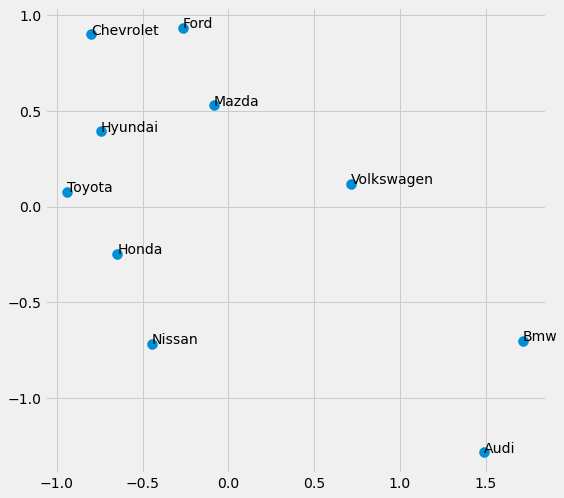

In [247]:
#mds plot: brand comentions 
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
import numpy as np
with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(1, figsize=(8,8))

    # plot data
    x = mds_df.component0
    y = mds_df.component1
    plt.scatter(x, y, s=100)
    
    n = mds_df.index
    for i, txt in enumerate(n):
        ax.annotate(txt, (x[i], y[i]))   

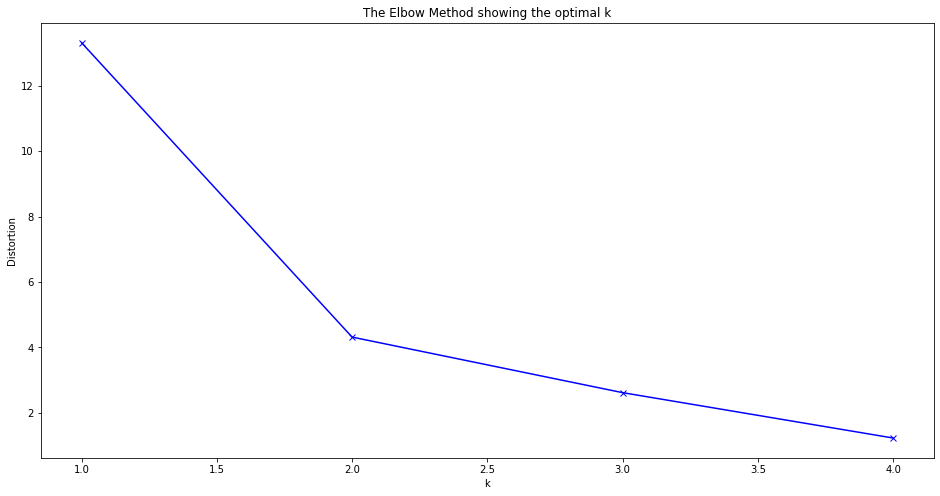

In [255]:
#elbow method 
from sklearn.cluster import KMeans

distortions = []
K = range(1,5)

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(mds_df)
    distortions.append(model.inertia_)


plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

#elbow occurs at 3 

In [256]:
#kmeans clustering model 
model = KMeans(n_clusters=3)
model.fit(mds_df)
mds_df['label']= model.predict(mds_df)
mds_df

,component0,component1,label
brand,,,
Honda,-0.647994,-0.245986,2
Toyota,-0.937700,0.077087,2
Nissan,-0.446508,-0.719302,2
Volkswagen,0.715761,0.117917,1
Chevrolet,-0.797773,0.900556,1
Mazda,-0.084690,0.528911,1
Ford,-0.266771,0.934685,1
Bmw,1.717579,-0.702027,0
Hyundai,-0.744033,0.393318,2


In [258]:
top10v.columns = ['brand', "total", "pct"]
mds_df["pct_mentions"] = top10v.pct.to_list()
mds_df

,component0,component1,label,c,pct_mentions
brand,,,,,
Honda,-0.647994,-0.245986,2,#2095DF,15.65
Toyota,-0.937700,0.077087,2,#2095DF,13.02
Nissan,-0.446508,-0.719302,2,#2095DF,8.89
Volkswagen,0.715761,0.117917,1,#81DF20,6.26
Chevrolet,-0.797773,0.900556,1,#81DF20,5.71
Mazda,-0.084690,0.528911,1,#81DF20,5.28
Ford,-0.266771,0.934685,1,#81DF20,4.81
Bmw,1.717579,-0.702027,0,#DF2020,4.66
Hyundai,-0.744033,0.393318,2,#2095DF,4.01


QhullError: QH6214 qhull input error: not enough points(2) to construct initial simplex (need 3)

While executing:  | qhull i Qt
Options selected for Qhull 2019.1.r 2019/06/21:
  run-id 1330952023  incidence  Qtriangulate  _pre-merge  _zero-centrum
  _maxoutside  0


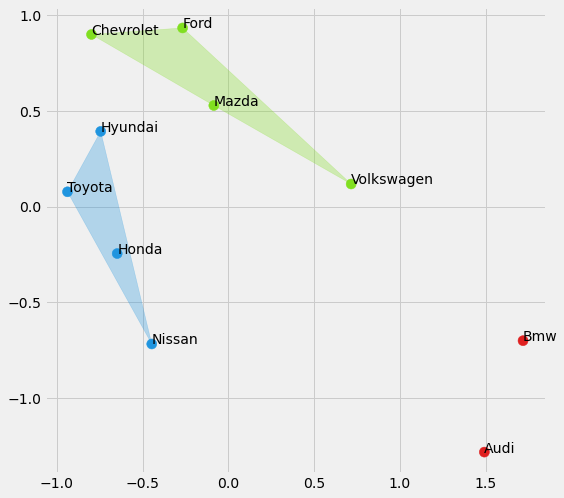

In [257]:
# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF']
mds_df['c'] = mds_df.label.map({0:colors[0], 1:colors[1], 2:colors[2]})

from scipy.spatial import ConvexHull
import numpy as np
with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(1, figsize=(8,8))

    # plot data
    x = mds_df.component0
    y = mds_df.component1
    plt.scatter(x, y, c=mds_df.c, s=100)
    
    n = mds_df.index
    for i, txt in enumerate(n):
        ax.annotate(txt, (x[i], y[i]))  

    # draw enclosure
    for i in mds_df.label.unique(): 
        points = mds_df[mds_df.label == i][['component0', 'component1']].values
        # get convex hull
        hull = ConvexHull(points)
        # get x and y coordinates
        # repeat last point to close the polygon
        x_hull = np.append(points[hull.vertices,0],
                        points[hull.vertices,0][0])
        y_hull = np.append(points[hull.vertices,1],
                        points[hull.vertices,1][0])
        # plot shape
        plt.fill(x_hull, y_hull, alpha=0.3, c=colors[i])
    
        
    plt.xlim(0,200)
    plt.ylim(0,200)

In [250]:
mds_df

,component0,component1,label,pct_mentions,c
brand,,,,,
Honda,-0.647994,-0.245986,2,15.65,NaN
Toyota,-0.937700,0.077087,2,13.02,NaN
Nissan,-0.446508,-0.719302,2,8.89,NaN
Volkswagen,0.715761,0.117917,1,6.26,NaN
Chevrolet,-0.797773,0.900556,0,5.71,NaN
Mazda,-0.084690,0.528911,0,5.28,NaN
Ford,-0.266771,0.934685,0,4.81,NaN
Bmw,1.717579,-0.702027,1,4.66,NaN
Hyundai,-0.744033,0.393318,0,4.01,NaN


<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


QhullError: QH6214 qhull input error: not enough points(2) to construct initial simplex (need 3)

While executing:  | qhull i Qt
Options selected for Qhull 2019.1.r 2019/06/21:
  run-id 1334649563  incidence  Qtriangulate  _pre-merge  _zero-centrum
  _maxoutside  0


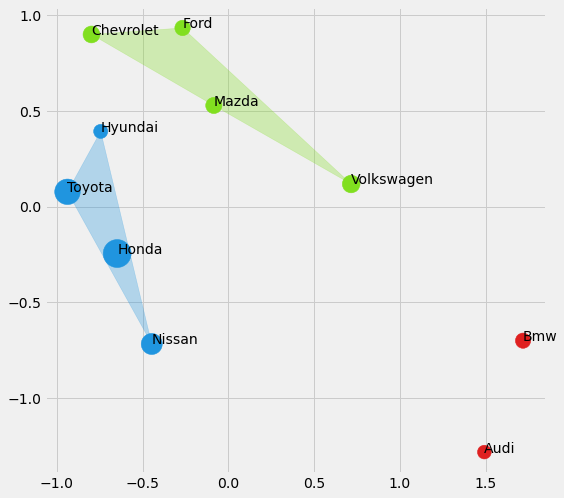

In [265]:
# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF']
mds_df['c'] = mds_df.label.map({0:colors[0], 1:colors[1], 2:colors[2]})

mds_df['pct_mentions'] = pd.to_numeric(mds_df['pct_mentions'])
from scipy.spatial import ConvexHull
import numpy as np
with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(1, figsize=(8,8))

    # plot data
    x = mds_df.component0
    y = mds_df.component1
    plt.scatter(x, y, c=mds_df.c, s=mds_df.pct_mentions*50)
    
    n = mds_df.index
    for i, txt in enumerate(n):
        ax.annotate(txt, (x[i], y[i])) 

    # draw enclosure
    for i in mds_df.label.unique(): 
        points = mds_df[mds_df.label == i][['component0', 'component1']].values
        # get convex hull
        hull = ConvexHull(points)
        # get x and y coordinates
        # repeat last point to close the polygon
        x_hull = np.append(points[hull.vertices,0],
                        points[hull.vertices,0][0])
        y_hull = np.append(points[hull.vertices,1],
                        points[hull.vertices,1][0])
        # plot shape
        plt.fill(x_hull, y_hull, alpha=0.3, c=colors[i])
    
        
    plt.xlim(0,200)
    plt.ylim(0,200)

In [ ]:
#graph 
import plotly.express as px
import plotly.io as pio
pio.renderers
pio.renderers.default = "notebook_connected"

mds_df['label'] = mds_df['label'].astype(str)
fig = px.scatter(mds_df , x="component0", y= "component1", text = mds_df.index, color = "label")
fig.update_traces(textposition='top center')

fig.update_layout(
    height=800,
    title_text='Brand Co-Mentions in the Forum for Finding the Ideal Car',
    yaxis_title = None,
    xaxis_title = None
)

fig.update_traces(textfont_size=14)

fig.show()